Nama : Debora Udania Simanjuntak

Email : debora.udania.simanjuntak@mail.ugm.ac.id 

Nama Program : Belajar Pengembangan Machine Learning

**1. Import Library**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt


**2. Get the Dataset From The Resource**

In [3]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-14 00:58:21--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  3.63MB/s    in 78s     

2021-07-14 00:59:41 (3.92 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



**3. Understanding The Data**

In [4]:
import zipfile,os
local_zip='rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall(path='/rps')
zip_ref.close()


In [5]:
len(os.listdir('/rps/rockpaperscissors/paper/'))

712

In [6]:
len(os.listdir('/rps/rockpaperscissors/rock/'))

726

In [7]:
len(os.listdir('/rps/rockpaperscissors/scissors/'))

750

**4. Spilt the data into train and val, which each directory contains paper, rock, scissors**

In [8]:
pip install split-folders


In [9]:
import splitfolders
import shutil

In [10]:
os.makedirs('/rps/output')
os.makedirs('/rps/input')

In [11]:
os.makedirs('/rps/input/paper')
os.makedirs('/rps/input/rock')
os.makedirs('/rps/input/scissors')

In [12]:
source_dir = '/rps/rockpaperscissors/paper'
target_dir = '/rps/input/paper'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [13]:
source_dir = '/rps/rockpaperscissors/rock'
target_dir = '/rps/input/rock'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [14]:
source_dir = '/rps/rockpaperscissors/scissors'
target_dir = '/rps/input/scissors'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [15]:
splitfolders.ratio("/rps/input",output="/rps/output",seed=1337,ratio=(.8,.2))

Copying files: 2188 files [00:00, 3055.89 files/s]


In [16]:
train_dir='/rps/output/train'
val_dir='/rps/output/val'

In [17]:
train_rock='/rps/output/train/rock'
train_paper='/rps/output/train/paper'
train_scissors='/rps/output/train/scissors'
val_rock='/rps/output/train/rock'
val_paper='/rps/output/train/paper'
val_scissors='/rps/output/train/scissors'

**5. Apply Image Data Generator**

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [20]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir, 
        target_size=(150, 150), 
        batch_size=32,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


**6.  Build the Model**

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**7. Train The Model**

In [24]:
# Make callback function
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95 ) and (logs.get('val_accuracy')>0.95):
      print("\accuracy and val_accuracy have reached > 95 percent!")
      self.model.stop_training = True
callbacks = myCallback()

In [25]:
history=model.fit(
      train_generator,
      steps_per_epoch=25,
      batch_size=64,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5, 
      verbose=2,
      callbacks=[callbacks])

Epoch 1/20
25/25 - 46s - loss: 1.2300 - accuracy: 0.4246 - val_loss: 1.0301 - val_accuracy: 0.4500
Epoch 2/20
25/25 - 43s - loss: 0.8444 - accuracy: 0.6299 - val_loss: 0.7368 - val_accuracy: 0.6812
Epoch 3/20
25/25 - 43s - loss: 0.4746 - accuracy: 0.8441 - val_loss: 0.4251 - val_accuracy: 0.8313
Epoch 4/20
25/25 - 43s - loss: 0.3495 - accuracy: 0.8612 - val_loss: 0.3994 - val_accuracy: 0.8438
Epoch 5/20
25/25 - 43s - loss: 0.2472 - accuracy: 0.9176 - val_loss: 0.4953 - val_accuracy: 0.8438
Epoch 6/20
25/25 - 42s - loss: 0.2071 - accuracy: 0.9265 - val_loss: 0.2319 - val_accuracy: 0.9312
Epoch 7/20
25/25 - 43s - loss: 0.2384 - accuracy: 0.9162 - val_loss: 0.2958 - val_accuracy: 0.9312
Epoch 8/20
25/25 - 42s - loss: 0.2240 - accuracy: 0.9202 - val_loss: 0.3433 - val_accuracy: 0.9000
Epoch 9/20
25/25 - 42s - loss: 0.1240 - accuracy: 0.9607 - val_loss: 0.3489 - val_accuracy: 0.9187
Epoch 10/20
25/25 - 45s - loss: 0.2128 - accuracy: 0.9278 - val_loss: 0.1777 - val_accuracy: 0.9375
Epoch 11/

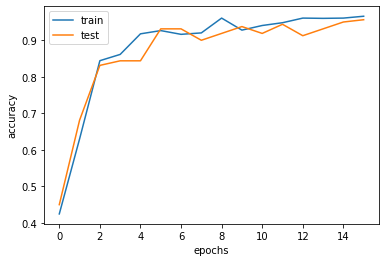

In [32]:
# Plotting Accuraccy and Loss in Train and Test

plt.plot(history.history.get('accuracy'))
plt.plot(history.history.get('val_accuracy'))
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

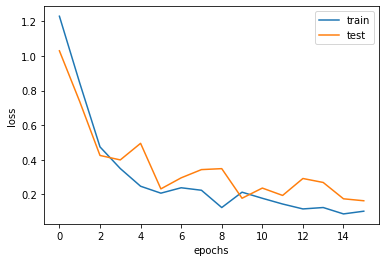

In [27]:
plt.plot(history.history.get('loss'))
plt.plot(history.history.get('val_loss'))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

**8. Predict New Image Using The Model**

Saving download.jfif to download.jfif
download.jfif
paper


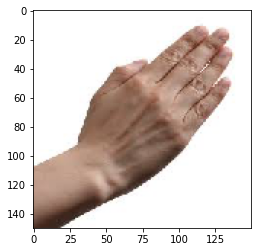

In [28]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if np.argmax(classes)==0:
    print('paper')
  elif np.argmax(classes)==1:
    print('rock')
  else:
    print('scissors')

**9. Convert Model to TF-Lite**

In [29]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpepl_th3o/assets


In [30]:
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)